In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
warnings.filterwarnings("ignore")

**Data Loading**

The dataset focuses on global Tuberculosis (TB) incidence, along with various demographic, socioeconomic, healthcare, and behavioral indicators for different countries or regions. It aims to help understand which factors contribute most to the burden of TB and allows the development of predictive models to identify high-risk regions or populations.

In [2]:
df = pd.read_csv('Tuberculosis_Dataset_Final_1.csv')

Dataset Preview

In [3]:
df.head()

,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
0,Country_52,2003,56.145286,788566,15.124856,63.008939,18.417301,39.939777,38.323440,13.115522,...,25-54,Female,4.491676,87.163577,1.405499,27.964788,98235.25849,41.642988,53.486072,89.256182
1,Country_15,2021,137.470346,1282706,1.365238,63.861596,25.804928,78.360506,48.317584,13.676533,...,0-14,Female,0.527789,61.848695,4.022342,29.374837,35130.17290,63.968269,76.473413,42.549955
2,Country_61,2014,179.814220,1100374,13.770958,92.017009,15.319141,27.609710,9.085422,3.070677,...,65+,Female,0.977231,63.133755,14.618375,23.704493,24703.77697,81.883098,59.468310,29.938714
3,Country_21,2014,124.211205,1141641,8.198825,94.747900,9.405584,73.239525,39.927303,7.360397,...,65+,Male,3.218930,55.069057,5.758827,21.854778,16417.48376,64.295034,96.677853,32.578901
4,Country_24,2011,50.394259,759040,4.472235,83.710431,37.830973,11.821832,48.280581,4.958237,...,55-64,Female,1.938210,70.991237,0.201211,23.512661,60373.61432,52.874425,88.048894,17.109448


Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country                            15000 non-null  object 
 1   Year                               15000 non-null  int64  
 2   TB_Incidence_Rate                  15000 non-null  float64
 3   Population                         15000 non-null  int64  
 4   HIV_Prevalence                     15000 non-null  float64
 5   Treatment_Success_Rate             15000 non-null  float64
 6   Mortality_Rate                     15000 non-null  float64
 7   Urban_Population_Percentage        15000 non-null  float64
 8   Smoking_Rate                       15000 non-null  float64
 9   Alcohol_Consumption                15000 non-null  float64
 10  Healthcare_Expenditure_Per_Capita  15000 non-null  float64
 11  Primary_Healthcare_Access          15000 non-null  flo

Descriptive Statistics

In [5]:
df.describe()

,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,Healthcare_Expenditure_Per_Capita,Primary_Healthcare_Access,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
count,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2010.947667,149.063862,1.003473e+06,9.999110,80.043543,20.135695,50.212376,27.408117,7.494238,2540.029362,74.933077,2.492330,74.482496,9.897109,15.021411,50487.493724,62.539131,75.085250,49.837560
std,6.638604,50.129026,4.899962e+05,5.794635,11.609116,9.745061,23.105076,12.973017,4.294321,1404.024065,14.401109,1.448848,14.083611,5.785617,8.683569,28721.266599,12.980989,14.393096,23.062006
min,2000.000000,0.000000,1.000000e+04,0.000586,60.002272,0.000000,10.007830,5.000892,0.000514,100.430637,50.000868,0.000061,50.006455,0.000936,0.001788,507.911699,40.003297,50.004494,10.008521
25%,2005.000000,115.444909,6.641148e+05,4.957956,69.889197,13.377880,30.321525,16.231191,3.779844,1332.471600,62.430763,1.230549,62.467337,4.891025,7.541157,25663.916980,51.343053,62.607481,29.834131
50%,2011.000000,149.166462,1.006138e+06,10.020874,80.164956,20.134075,50.507161,27.379437,7.465862,2548.890416,74.952261,2.497154,74.393548,9.864520,15.125270,50470.505315,62.646493,75.075907,49.903451
75%,2017.000000,182.474309,1.338657e+06,15.008059,90.092290,26.717571,70.270218,38.615461,11.188029,3729.488329,87.263625,3.752165,86.721623,14.876946,22.539598,75489.763868,73.812960,87.536410,69.769785
max,2022.000000,312.103552,2.917749e+06,19.998560,99.999655,58.232348,89.981559,49.998718,14.999836,4999.825949,99.997271,4.999890,98.993023,19.999742,29.999527,99999.868250,84.997816,99.993587,89.997341


Dataset Shape and Column Types

In [6]:
print("Dataset Shape:", df.shape)
print("\nColumn Types:\n")
print(df.dtypes)

Dataset Shape: (15000, 22)

Column Types:

Country                               object
Year                                   int64
TB_Incidence_Rate                    float64
Population                             int64
HIV_Prevalence                       float64
Treatment_Success_Rate               float64
Mortality_Rate                       float64
Urban_Population_Percentage          float64
Smoking_Rate                         float64
Alcohol_Consumption                  float64
Healthcare_Expenditure_Per_Capita    float64
Primary_Healthcare_Access            float64
Age_Group                             object
Gender                                object
HIV_CoInfection_Rate                 float64
BCG_Vaccination_Coverage             float64
Multidrug_Resistance_Rate            float64
Unemployment_Rate                    float64
GDP_Per_Capita                       float64
Life_Expectancy                      float64
TB_Screening_Coverage                float64
Rural_Popula

Missing Values Check

In [7]:
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

Country                              0
Year                                 0
TB_Incidence_Rate                    0
Population                           0
HIV_Prevalence                       0
Treatment_Success_Rate               0
Mortality_Rate                       0
Urban_Population_Percentage          0
Smoking_Rate                         0
Alcohol_Consumption                  0
Healthcare_Expenditure_Per_Capita    0
Primary_Healthcare_Access            0
Age_Group                            0
Gender                               0
HIV_CoInfection_Rate                 0
BCG_Vaccination_Coverage             0
Multidrug_Resistance_Rate            0
Unemployment_Rate                    0
GDP_Per_Capita                       0
Life_Expectancy                      0
TB_Screening_Coverage                0
Rural_Population_Percentage          0
dtype: int64


Summary Statistics

In [8]:
print("\nSummary Statistics:\n")
display(df.describe(include='all'))


Summary Statistics:



,Country,Year,TB_Incidence_Rate,Population,HIV_Prevalence,Treatment_Success_Rate,Mortality_Rate,Urban_Population_Percentage,Smoking_Rate,Alcohol_Consumption,...,Age_Group,Gender,HIV_CoInfection_Rate,BCG_Vaccination_Coverage,Multidrug_Resistance_Rate,Unemployment_Rate,GDP_Per_Capita,Life_Expectancy,TB_Screening_Coverage,Rural_Population_Percentage
count,15000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000,15000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
unique,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Country_17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55-64,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3059,7541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2010.947667,149.063862,1.003473e+06,9.999110,80.043543,20.135695,50.212376,27.408117,7.494238,...,NaN,NaN,2.492330,74.482496,9.897109,15.021411,50487.493724,62.539131,75.085250,49.837560
std,NaN,6.638604,50.129026,4.899962e+05,5.794635,11.609116,9.745061,23.105076,12.973017,4.294321,...,NaN,NaN,1.448848,14.083611,5.785617,8.683569,28721.266599,12.980989,14.393096,23.062006
min,NaN,2000.000000,0.000000,1.000000e+04,0.000586,60.002272,0.000000,10.007830,5.000892,0.000514,...,NaN,NaN,0.000061,50.006455,0.000936,0.001788,507.911699,40.003297,50.004494,10.008521
25%,NaN,2005.000000,115.444909,6.641148e+05,4.957956,69.889197,13.377880,30.321525,16.231191,3.779844,...,NaN,NaN,1.230549,62.467337,4.891025,7.541157,25663.916980,51.343053,62.607481,29.834131
50%,NaN,2011.000000,149.166462,1.006138e+06,10.020874,80.164956,20.134075,50.507161,27.379437,7.465862,...,NaN,NaN,2.497154,74.393548,9.864520,15.125270,50470.505315,62.646493,75.075907,49.903451
75%,NaN,2017.000000,182.474309,1.338657e+06,15.008059,90.092290,26.717571,70.270218,38.615461,11.188029,...,NaN,NaN,3.752165,86.721623,14.876946,22.539598,75489.763868,73.812960,87.536410,69.769785


Duplicate Rows Check

In [9]:
print("\nNumber of Duplicate Rows:", df.duplicated().sum())


Number of Duplicate Rows: 0


Unique Values in Categorical Columns

In [10]:
print("\nUnique Values in Categorical Columns:\n")
cat_cols = ['Country', 'Age_Group', 'Gender']
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values in Categorical Columns:

Country: 70 unique values
Age_Group: 5 unique values
Gender: 2 unique values


Value Counts

In [11]:
print("\nValue Counts:\n")
for col in cat_cols:
    print(f"\n{col}:\n{df[col].value_counts().head(10)}")


Value Counts:


Country:
Country
Country_17    258
Country_21    257
Country_15    252
Country_19    242
Country_13    241
Country_62    240
Country_26    239
Country_38    235
Country_48    234
Country_51    230
Name: count, dtype: int64

Age_Group:
Age_Group
55-64    3059
0-14     3037
65+      3010
25-54    2998
15-24    2896
Name: count, dtype: int64

Gender:
Gender
Male      7541
Female    7459
Name: count, dtype: int64


**DATA VISUALIZATION**

In [12]:
sns.set(style="whitegrid", palette="muted")
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Distribution of TB Incidence Rate

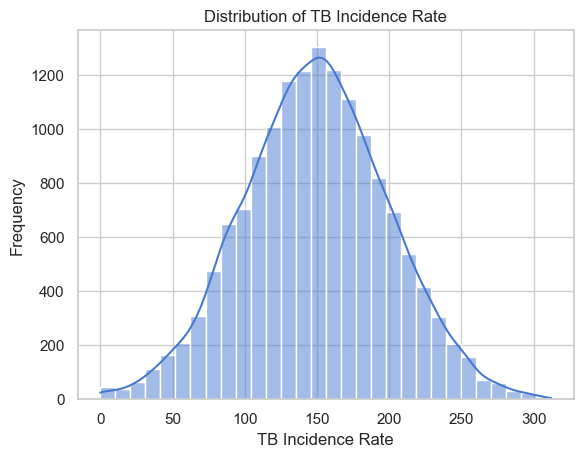

In [13]:
sns.histplot(df['TB_Incidence_Rate'], kde=True, bins=30)
plt.title("Distribution of TB Incidence Rate")
plt.xlabel("TB Incidence Rate")
plt.ylabel("Frequency")
plt.show()

TB Incidence Rate by Gender 

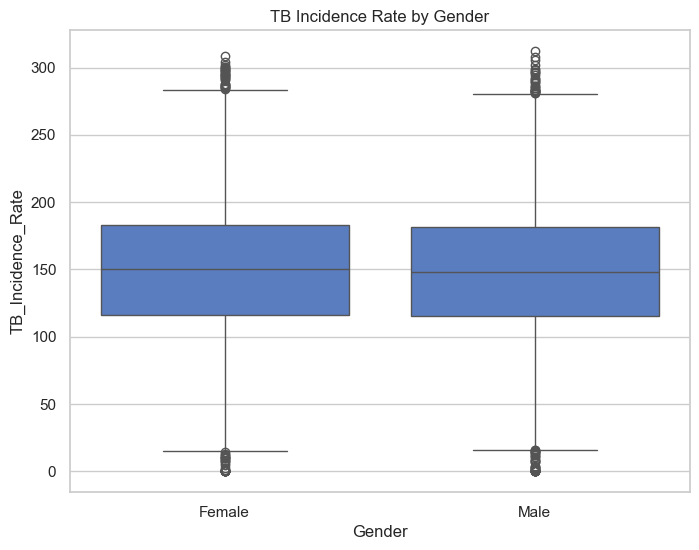

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Gender', y='TB_Incidence_Rate', data=df)
plt.title("TB Incidence Rate by Gender")
plt.show()

TB Incidence Rate by Age Group

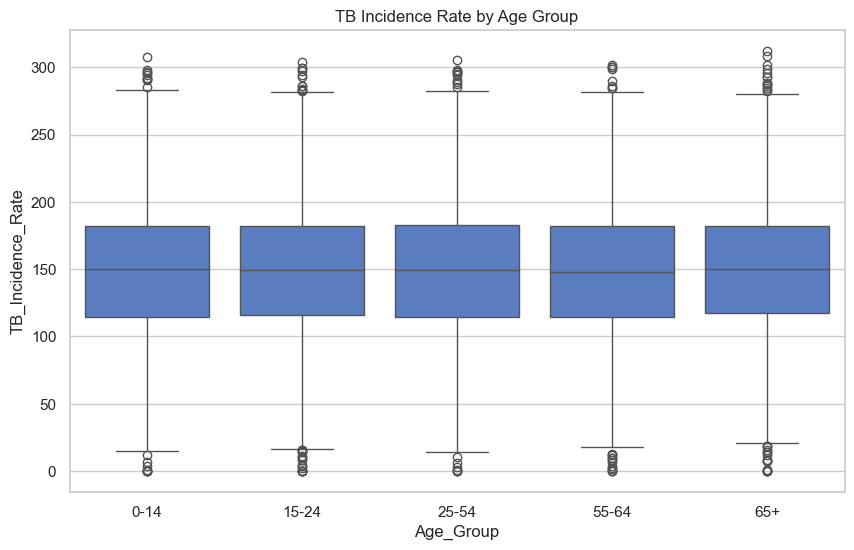

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='TB_Incidence_Rate', data=df, order=sorted(df['Age_Group'].unique()))
plt.title("TB Incidence Rate by Age Group")
plt.show()

Trend of TB Incidence Rate Over Years 

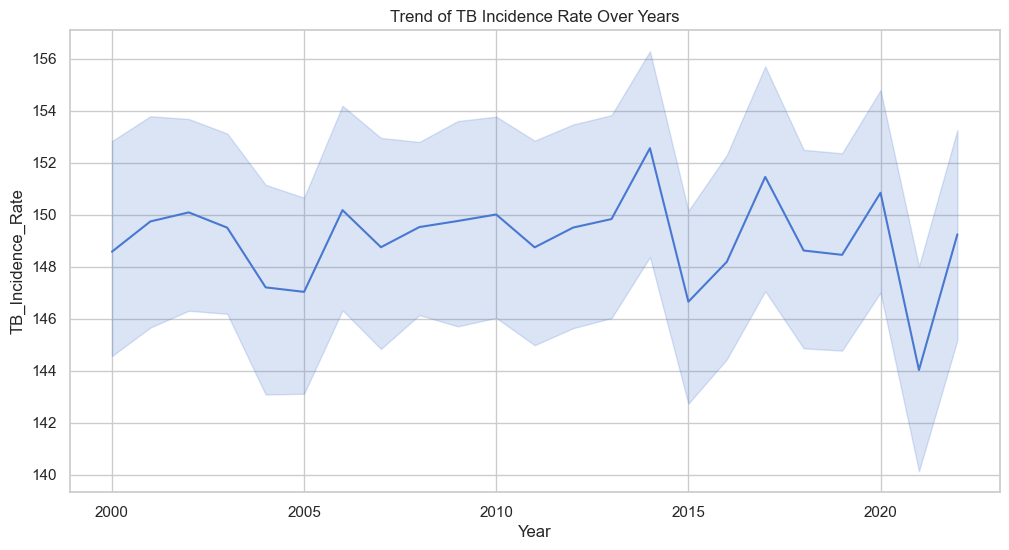

In [16]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='TB_Incidence_Rate', data=df)
plt.title("Trend of TB Incidence Rate Over Years")
plt.show()

Correlation Heatmap

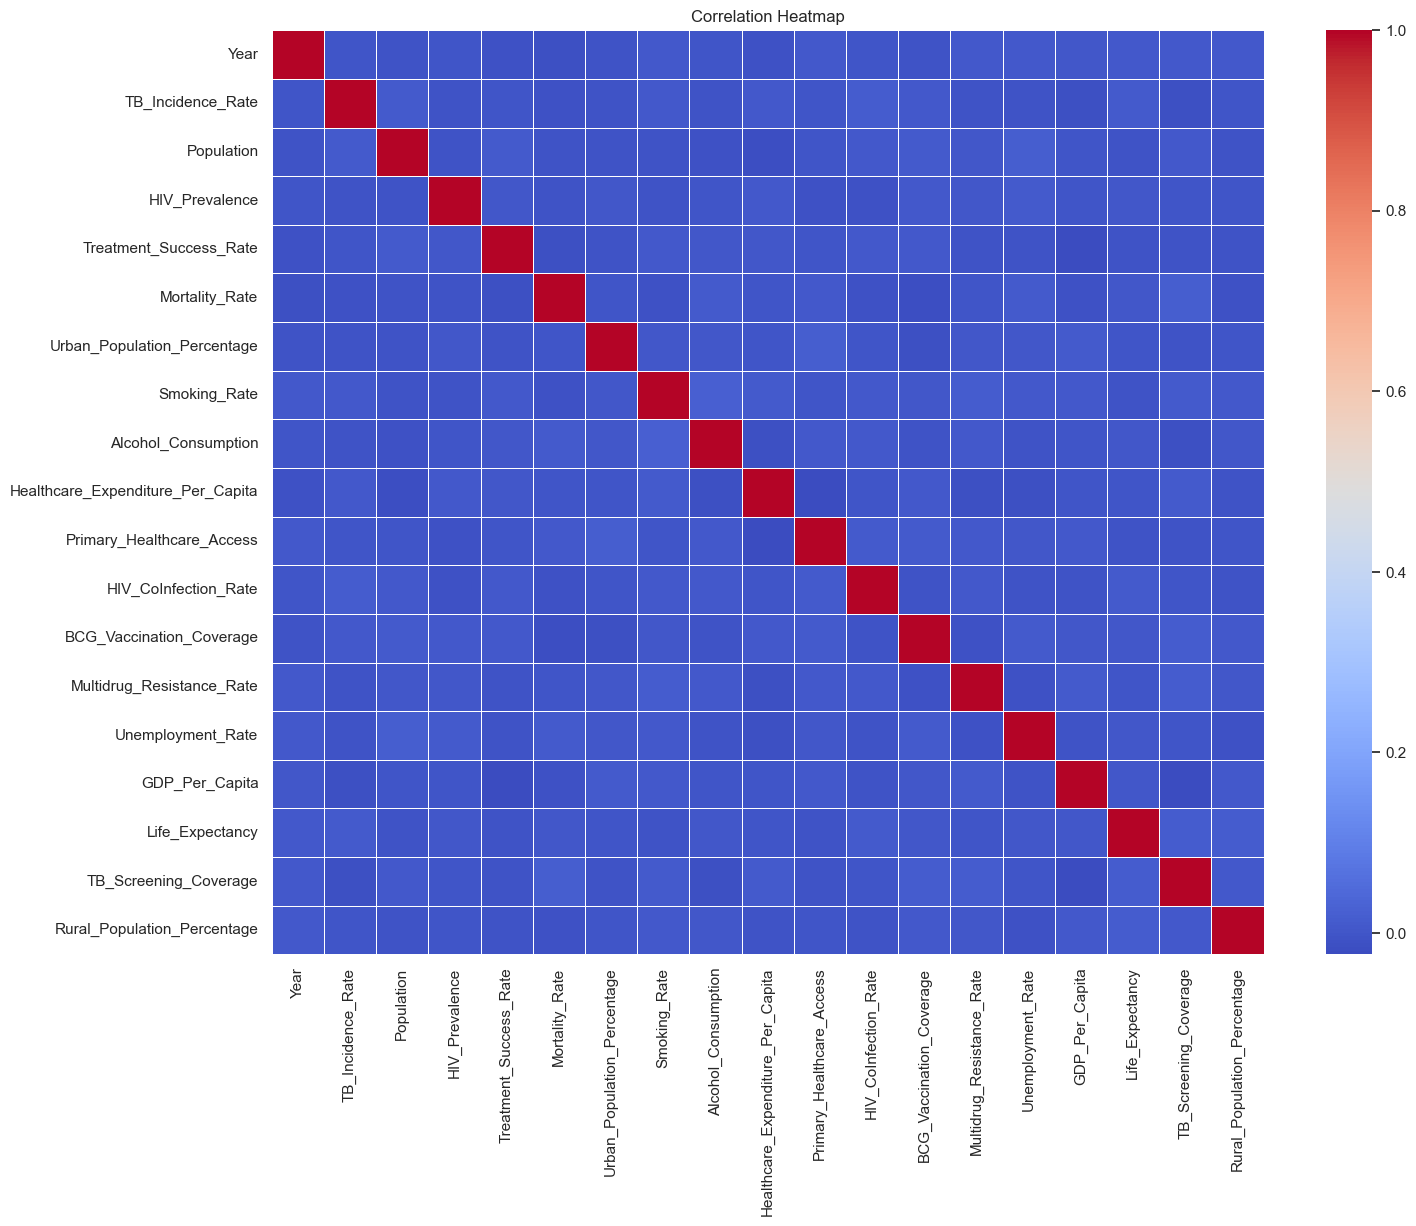

In [17]:
plt.figure(figsize=(16, 12))
corr_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Top Features Positively Correlated with TB Incidence Rate

In [18]:
top_corr = corr_matrix['TB_Incidence_Rate'].drop('TB_Incidence_Rate').sort_values(ascending=False)
print("\nTop positively correlated features with TB Incidence Rate:\n")
print(top_corr.head(5))


Top positively correlated features with TB Incidence Rate:

HIV_CoInfection_Rate                 0.015758
Population                           0.012167
Life_Expectancy                      0.010846
Smoking_Rate                         0.006893
Healthcare_Expenditure_Per_Capita    0.005126
Name: TB_Incidence_Rate, dtype: float64


Top Features Negatively Correlated with TB Incidence Rate

In [19]:
print("\nTop negatively correlated features with TB Incidence Rate:\n")
print(top_corr.tail(5))


Top negatively correlated features with TB Incidence Rate:

Alcohol_Consumption         -0.005624
Multidrug_Resistance_Rate   -0.007160
Mortality_Rate              -0.008170
GDP_Per_Capita              -0.012375
TB_Screening_Coverage       -0.014113
Name: TB_Incidence_Rate, dtype: float64


**Handling Missing Values**

In [20]:
df_cleaned = df.dropna()

Encoding Categorical Variables

In [21]:
df_encoded = pd.get_dummies(df_cleaned, columns=['Country', 'Age_Group', 'Gender'], drop_first=True)

Feature and Target Separation

In [22]:
X = df_encoded.drop('TB_Incidence_Rate', axis=1)
y = df_encoded['TB_Incidence_Rate']

Train-Test Split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Feature Scaling

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Feature and Target Separation Using Original Data

In [25]:
X = df.drop('TB_Incidence_Rate', axis=1)
y = df['TB_Incidence_Rate']

One-Hot Encoding of Feature Set

In [26]:
X = pd.get_dummies(X)

Train-Test Split (After Encoding)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Model Training

In [28]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

**Hyperparameter Grid for Random Forest**

In [29]:
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

Initialize Random Forest Regressor

In [30]:
rf = RandomForestRegressor(random_state=42)

 Randomized Search for Hyperparameter Tuning

In [31]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=30,
    cv=5,
    verbose=1,
    n_jobs=-1,
    scoring='r2'
)

Run RandomizedSearchCV

In [32]:
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=30, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400]},
                   scoring='r2', verbose=1)

Select Best Estimator from Randomized Search

In [33]:
best_rf = random_search.best_estimator_

Make Predictions on Test Set

In [34]:
y_pred = best_rf.predict(X_test_scaled)

Evaluate Model Performance

In [35]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

Display Best Hyperparameters

In [36]:
print("🔍 Best Parameters:")
print(random_search.best_params_)

🔍 Best Parameters:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}


Final Model Evaluation Metrics

In [37]:
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

Mean Absolute Error (MAE)

In [38]:
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {round(mae, 2)}")

Mean Absolute Error (MAE): 40.08


Model Performance After Hyperparameter Tuning

In [39]:
print("\n✅ Model Performance After Tuning:")
print(f"R² Score: {round(r2, 3)}")
print(f"Root Mean Squared Error: {round(rmse, 2)}")


✅ Model Performance After Tuning:
R² Score: -0.002
Root Mean Squared Error: 50.19


Create Binary Target for High TB Risk

In [40]:
threshold = 70
df['High_TB_Risk'] = (df['TB_Incidence_Rate'] > threshold).astype(int)
df['High_TB_Risk'].value_counts()

High_TB_Risk
1    14159
0      841
Name: count, dtype: int64

Prepare Features and Labels for Classification Model

In [41]:
X = df.drop(['TB_Incidence_Rate', 'High_TB_Risk'], axis=1)
y = df['High_TB_Risk']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Random Forest Classifier: Training and Evaluation

In [42]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print("✅ Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧮 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

✅ Accuracy: 0.943

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       171
           1       0.94      1.00      0.97      2829

    accuracy                           0.94      3000
   macro avg       0.47      0.50      0.49      3000
weighted avg       0.89      0.94      0.92      3000


🧮 Confusion Matrix:
 [[   0  171]
 [   0 2829]]


ROC Curve for Random Forest Classifier

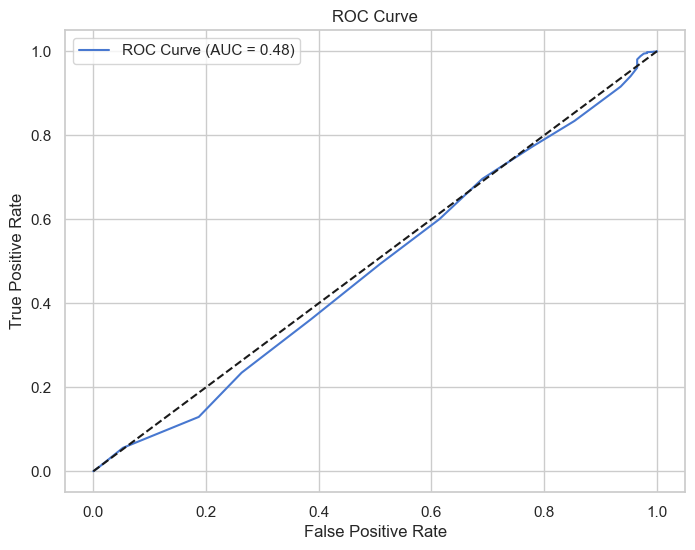

In [43]:
y_prob = clf.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

Confusion Matrix

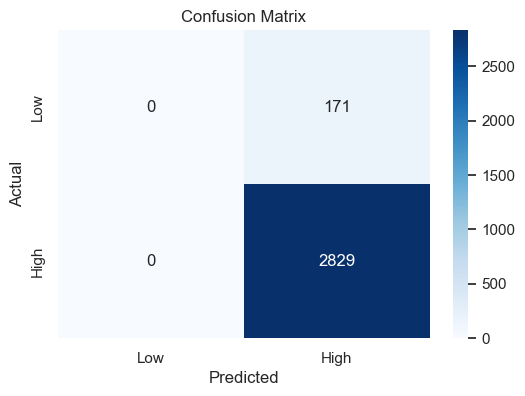

In [44]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'High'], yticklabels=['Low', 'High'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
print("\nProject Completed! 🎉")


Project Completed! 🎉
